In [2]:
import json
import os

### SEARCH NAIVE CLUSTERS

In [4]:
output_file = r'data/proccesing_train_without_SW.json'

error_data = []
micro_class_true = 0
micro_class_predict = 0
with open(output_file, encoding='utf-8-sig', mode='r') as f:
    json_file = json.load(f)
    for batch in json_file:
        micro_class_true +=  batch['clusters']
        micro_class_predict += len(batch['answers']) 
        accuracy = batch['clusters'] / len(batch['answers'])
        error_data.append(accuracy)
        print(accuracy)

print('ACCURACY Macro')
print(sum(error_data) / len(error_data))
print('ACCURACY Micro')
print(micro_class_true / micro_class_predict)

0.875
0.9166666666666666
0.72
0.8888888888888888
0.8888888888888888
0.9285714285714286
0.8181818181818182
0.7692307692307693
0.8571428571428571
1.0
1.0
1.0
0.72
1.0
0.7272727272727273
1.0
0.8076923076923077
1.0
1.0
0.7142857142857143
0.3333333333333333
1.0
0.8571428571428571
1.0
0.8571428571428571
1.0
1.0
0.9
0.875
0.8333333333333334
0.8181818181818182
1.0
0.8333333333333334
0.75
0.5555555555555556
1.0
1.0
0.8571428571428571
1.0
0.7586206896551724
1.0
1.0
0.8333333333333334
1.0
0.5714285714285714
0.75
0.5614035087719298
1.0
0.95
0.4878048780487805
0.8505747126436781
0.5263157894736842
0.7209302325581395
0.8571428571428571
0.6
0.46153846153846156
0.8888888888888888
0.5925925925925926
0.7777777777777778
0.782608695652174
0.8518518518518519
0.8125
0.8
1.0
0.8518518518518519
0.75
0.7941176470588235
1.0
0.7857142857142857
1.0
0.8571428571428571
0.7777777777777778
1.0
1.0
0.5625
0.875
1.0
0.7692307692307693
0.8666666666666667
0.8181818181818182
0.9230769230769231
0.7142857142857143
0.8636363

### LEVENSHTEIN

In [20]:
import Levenshtein

def cluster_similar_answers(json_data, similarity_threshold=0.63):
    """
    Кластеризация похожих ответов на основе сходства по Левенштейну и агрегирование их количества.
    Эта функция группирует похожие ответы из JSON-структуры на основе порога сходства Левенштейна.
    Ответы с коэффициентом сходства, равным или превышающим пороговое значение, будут сгруппированы в один кластер.
    Функция также агрегирует значения 'count' для ответов внутри каждого кластера.

    Args:
        json_data (dict): Словарь, содержащий список ответов с ключами 'answer' и 'count'.
        similarity_threshold (float, optional): Порог сходства Левенштейна для кластеризации.
            Ответы с коэффициентом сходства >= similarity_threshold будут сгруппированы вместе. По умолчанию 0.63.

    Return:
        dict: Словарь, ключами которого являются имена кластеров, а значениями - списки словарей с ключами
            ключами 'answer' и 'count' для сгруппированных ответов.
    """
    answers = json_data['answers']
    clusters = {}
    cluster_names = {}
    
    for i, answer1 in enumerate(answers):
        answer1 = answer1['answer']
        cluster_name = None
        
        for name, answer2 in cluster_names.items():
            similarity = Levenshtein.ratio(answer1, answer2)
            if similarity >= similarity_threshold:
                cluster_name = name
                break
        
        if cluster_name is None:
            # Создаем новый кластер, если не нашли подходящий
            cluster_name = i
        
        clusters.setdefault(cluster_name, []).append(answer1)
        cluster_names[cluster_name] = max(cluster_names.get(cluster_name, ''), answer1, key=lambda x: Levenshtein.ratio(answer1, x))
    # print(cluster_names)

    
    return clusters

In [60]:
output_file = r'data/proccesing_train_without_SW.json'

error_data = []
micro_class_true = 0
micro_class_predict = 0
with open(output_file, encoding='utf-8-sig', mode='r') as f:
    json_file = json.load(f)
    for batch in json_file:
        lev_clusters = len(cluster_similar_answers(batch, similarity_threshold=0.625))
        micro_class_true += batch['clusters']
        micro_class_predict += lev_clusters
        accuracy = min(batch['clusters'], lev_clusters) / max(batch['clusters'], lev_clusters)
        error_data.append(accuracy)
        # print(accuracy)

print('ACCURACY Macro')
print(sum(error_data) / len(error_data))
print('ACCURACY Micro')
print(min(micro_class_true, micro_class_predict) / max(micro_class_true, micro_class_predict))

ACCURACY Macro
0.8932976131206767
ACCURACY Micro
0.9689223057644111


In [27]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

docs_fetch = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))["data"]
topic_model = BERTopic(verbose=True)
topics, probs = topic_model.fit_transform(docs_fetch)

Batches:   1%|▏         | 8/589 [00:24<30:00,  3.10s/it]


KeyboardInterrupt: 

In [4]:
from bertopic import BERTopic
import torch
from torch.utils.checkpoint import checkpoint
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2")

In [29]:
docs = [docs*3 for docs in docs]
docs

['top managerstop managerstop managers',
 'security requirements for psecurity requirements for psecurity requirements for p',
 'increase headcount from toincrease headcount from toincrease headcount from to',
 'narrowly focused activitiesnarrowly focused activitiesnarrowly focused activities',
 'listening skillslistening skillslistening skills',
 'simplify procurementsimplify procurementsimplify procurement',
 'participation of leaders in board meetingsparticipation of leaders in board meetingsparticipation of leaders in board meetings',
 'physicalphysicalphysical',
 'this support is already in placethis support is already in placethis support is already in place',
 'methodologicalmethodologicalmethodological',
 'methodologymethodologymethodology',
 'trainingstrainingstrainings']

In [2]:
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

In [148]:
from transformers.pipelines import pipeline
from umap import UMAP
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired

representation_model = KeyBERTInspired()


umap_model = UMAP(n_neighbors=4, n_components=1, min_dist=0.0, metric='minkowski', low_memory=True) # chebyshev manhattan
embedding_model = pipeline("feature-extraction", model="shibing624/text2vec-base-multilingual")
hdbscan_model = HDBSCAN(min_cluster_size=3, min_samples=1, metric='euclidean', prediction_data=True)
vectorizer_model = CountVectorizer(min_df=1, ngram_range=(1, 3))

topic_model = BERTopic(

  # Pipeline models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  vectorizer_model=vectorizer_model,
  representation_model=representation_model,

  # Hyperparameters
  top_n_words=5,
  min_topic_size=1,
  low_memory=True,
  verbose=True
)

In [157]:
topics, probs = topic_model.fit_transform(docs)
print(topics, probs)

100%|██████████| 25/25 [00:00<00:00, 70.80it/s]
2023-09-09 23:49:57,378 - BERTopic - Transformed documents to Embeddings
2023-09-09 23:49:58,821 - BERTopic - Reduced dimensionality
2023-09-09 23:49:58,825 - BERTopic - Clustered reduced embeddings


[1, 1, 1, 2, 2, 3, 3, 3, 5, 5, 0, 0, 0, 0, 4, 3, 4, 4, 1, 0, 4, 5, 2, 0, 2] [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.94211332 0.94211332
 1.         1.         1.         0.37197201 1.         1.
 1.         1.         1.         1.         1.         0.65999822
 1.        ]


In [166]:
represent = topic_model.get_representative_docs()
topic_dict = {key: value[0] for key, value in represent.items()}
print(topic_dict)


{0: 'прохождение мастер-классов', 1: 'прокачать тренерские знания', 2: 'повышение производительности', 3: 'проверить свои знания', 4: 'проектная деятельность', 5: 'систематизация'}


In [ ]:
def topic_represent(data: list[str]):
    topics, probs = topic_model.fit_transform(docs)

In [79]:
import json
output_file = r'data/train_data.json'

# error_data = []
# micro_class_true = 0
# micro_class_predict = 0
with open(output_file, encoding='utf-8-sig', mode='r') as f:
    json_file = json.load(f)
    for batch in json_file[2:3]:
        question = batch['question']
        docs = [answer['answer'] for answer in batch['answers']]
        
    print(docs)




        # micro_class_true += batch['clusters']
        # micro_class_predict += lev_clusters
        # accuracy = min(batch['clusters'], lev_clusters) / max(batch['clusters'], lev_clusters)
        # error_data.append(accuracy)
        # print(accuracy)

['прокачать тренерские знания', 'прокачать тренерские компетенц', 'прокачать тренерские навыки', 'совершенствоваться', 'повышение производительности', 'получить ответы на вопросы', 'узнать ответы на интерес. вопр', 'решение вопросов', 'понять дальнейшие действия', 'понять управление персоналом', 'посетить мастер-классы по инте', 'прохождение мастер-классов', 'применять', 'применять знания на своём пр-е', 'примеры реализованных проектов', 'проверить свои знания', 'проектная деятельность', 'управление проектами', 'стать тренером фцк', 'рассказать стране о шт', 'расширение творческих границ', 'систематизация', 'стать продуктивнее в работе', 'обучай. применяйте. соверш.', 'применяй обучай совершенствуй']


In [37]:
import pandas as pd

In [38]:
df = topic_model.get_topic_info()

In [34]:
df.to_excel('text.xlsx')

In [126]:
topic_name = list(topic_model.get_topic_info()['Name'])

In [127]:
topic_model.set_topic_labels(topic_labels=topic_name)

In [128]:
topic_model.visualize_barchart(custom_labels=True, width=450, height=400)

In [129]:
topic_model.visualize_topics()

In [130]:
topic_model.visualize_hierarchy()

In [132]:
topic_model.visualize_heatmap()


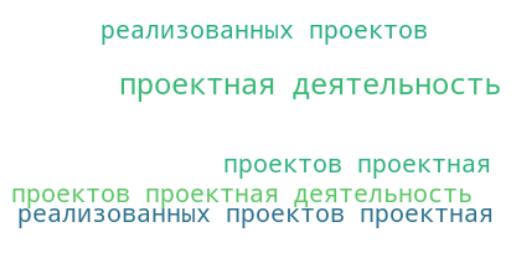

In [145]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(topic_model, topic=3)

In [21]:
from scipy.cluster import hierarchy as sch
from bertopic import BERTopic
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(docs)

# Hierarchical topics
linkage_function = lambda x: sch.linkage(x, 'single', optimal_ordering=True)
hierarchical_topics = topic_model.hierarchical_topics(docs, linkage_function=linkage_function)

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [63]:
docs

['топ менеджеры',
 'требования безопасности для р',
 'увеличить численность от до',
 'узконаправленная деятельность',
 'умение выслушать',
 'упростить закупки',
 'участие лидеров в совещ. рук.',
 'физическая',
 'эта поддержка уже есть',
 'методическая',
 'методология',
 'тренинги']

In [10]:
INPUT_FILE_PATH = r'data/train_data.json'
OUTPUT_FILE_PATH = r'data/predict_train.json'

data = []

# Вход и обучение
with open(INPUT_FILE_PATH, encoding='utf-8-sig') as json_file:
    for batch in json_file:
        for answer in batch['answers']:
        answer = batch['answers']['answer']
        sentiment = batch['answers']['sentiment']
        # ЗАСУНЬ СЮДА МОДЕЛЬ

        batch['answers']['answer'] = 
        batch['answers']['sentiment'] =

        #

        data.append(batch)

# Выход и сохранение
with open(OUTPUT_FILE_PATH, encoding='utf-8-sig') as f:
    f.write(json.dumps(data, indent=4))

SyntaxError: invalid syntax (2003544130.py, line 1)